
ESTADÍSTICAS POR CLUSTER:


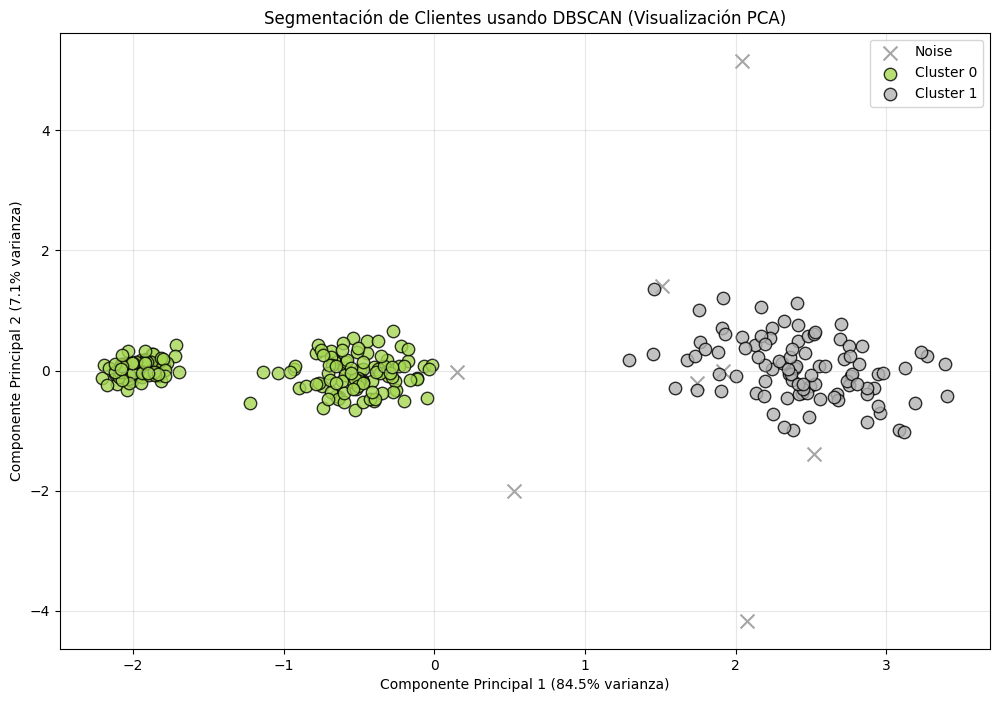

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')


# ============ Segmentación de Clientes con DBSCAN ============
def customer_segmentation_dbscan():
    """
    Ejemplo de segmentación de clientes usando DBSCAN
    """
    
    # Crear dataset simulado de clientes
    np.random.seed(42)
    
    # Parámetros para diferentes segmentos de clientes
    n_customers = 300
    
    # Segmento 1: Clientes de bajo gasto
    low_spenders = np.array([
        np.random.normal(500, 100, n_customers // 3),      # Gasto anual
        np.random.normal(5, 2, n_customers // 3),          # Compras por año
        np.random.normal(50, 10, n_customers // 3),        # Tiempo en sitio web
        np.random.normal(1, 0.5, n_customers // 3)         # Años de membresía
    ]).T
    
    # Segmento 2: Clientes de gasto medio
    mid_spenders = np.array([
        np.random.normal(1500, 200, n_customers // 3),     # Gasto anual
        np.random.normal(20, 5, n_customers // 3),         # Compras por año
        np.random.normal(100, 20, n_customers // 3),       # Tiempo en sitio web
        np.random.normal(4, 1, n_customers // 3)           # Años de membresía
    ]).T
    
    # Segmento 3: Clientes de alto gasto
    high_spenders = np.array([
        np.random.normal(4000, 500, n_customers // 3),     # Gasto anual
        np.random.normal(50, 10, n_customers // 3),        # Compras por año
        np.random.normal(200, 30, n_customers // 3),       # Tiempo en sitio web
        np.random.normal(8, 2, n_customers // 3)           # Años de membresía
    ]).T
    
    # Agregar algunos outliers
    outliers = np.array([
        [10000, 5, 10, 0.5],     # Cliente que gasta mucho pero no comprometido
        [50, 1, 200, 10],        # Cliente viejo que casi no gasta
        [5000, 10, 300, 3],      # Cliente con comportamiento mixto
        [200, 50, 500, 0.1],     # Cliente que compra mucho pero gasta poco
        [8000, 2, 20, 15]        # Cliente antiguo que gasta mucho ocasionalmente
    ])
    
    # Combinar todos los datos
    data = np.vstack([low_spenders, mid_spenders, high_spenders, outliers])
    
    # Crear DataFrame
    import pandas as pd
    columns = ["Annual_Spending", "Purchases_per_Year", "Time_on_Website", "Membership_Length"]
    df = pd.DataFrame(data, columns=columns)
    
    
    # Normalizar datos
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    
    # Aplicar DBSCAN
    dbscan = DBSCAN(eps=0.8, min_samples=5)
    labels = dbscan.fit_predict(data_scaled)
    
    # Agregar etiquetas al DataFrame
    df["Cluster"] = labels
    
    # Estadísticas por cluster
    print("\nESTADÍSTICAS POR CLUSTER:")
    cluster_stats = df.groupby("Cluster").agg({
        "Annual_Spending": ["count", "mean", "std", "min", "max"],
        "Purchases_per_Year": ["mean", "std"],
        "Time_on_Website": ["mean", "std"],
        "Membership_Length": ["mean", "std"]
    }).round(2)
    
    
    # Visualizar clusters (usando PCA para reducción de dimensionalidad)
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)
    
    df["PCA1"] = data_pca[:, 0]
    df["PCA2"] = data_pca[:, 1]
    
    # Graficar clusters en 2D
    plt.figure(figsize=(12, 8))
    
    unique_labels = np.unique(labels)
    colors = plt.cm.Set2(np.linspace(0, 1, len(unique_labels)))
    
    for label, color in zip(unique_labels, colors):
        if label == -1:
            # Ruido
            cluster_data = df[df["Cluster"] == label]
            plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"],
                       c='gray', marker='x', s=100, alpha=0.7, label='Noise')
        else:
            # Cluster
            cluster_data = df[df["Cluster"] == label]
            plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"],
                       color=color, s=80, alpha=0.8, edgecolors='k',
                       label=f'Cluster {label}')
    
    plt.title("Segmentación de Clientes usando DBSCAN (Visualización PCA)")
    plt.xlabel(f"Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} varianza)")
    plt.ylabel(f"Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} varianza)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Crear perfiles de clientes por cluster
    
    return df

customer_df = customer_segmentation_dbscan()


AJUSTE DE PARÁMETROS DBSCAN (eps y min_samples)


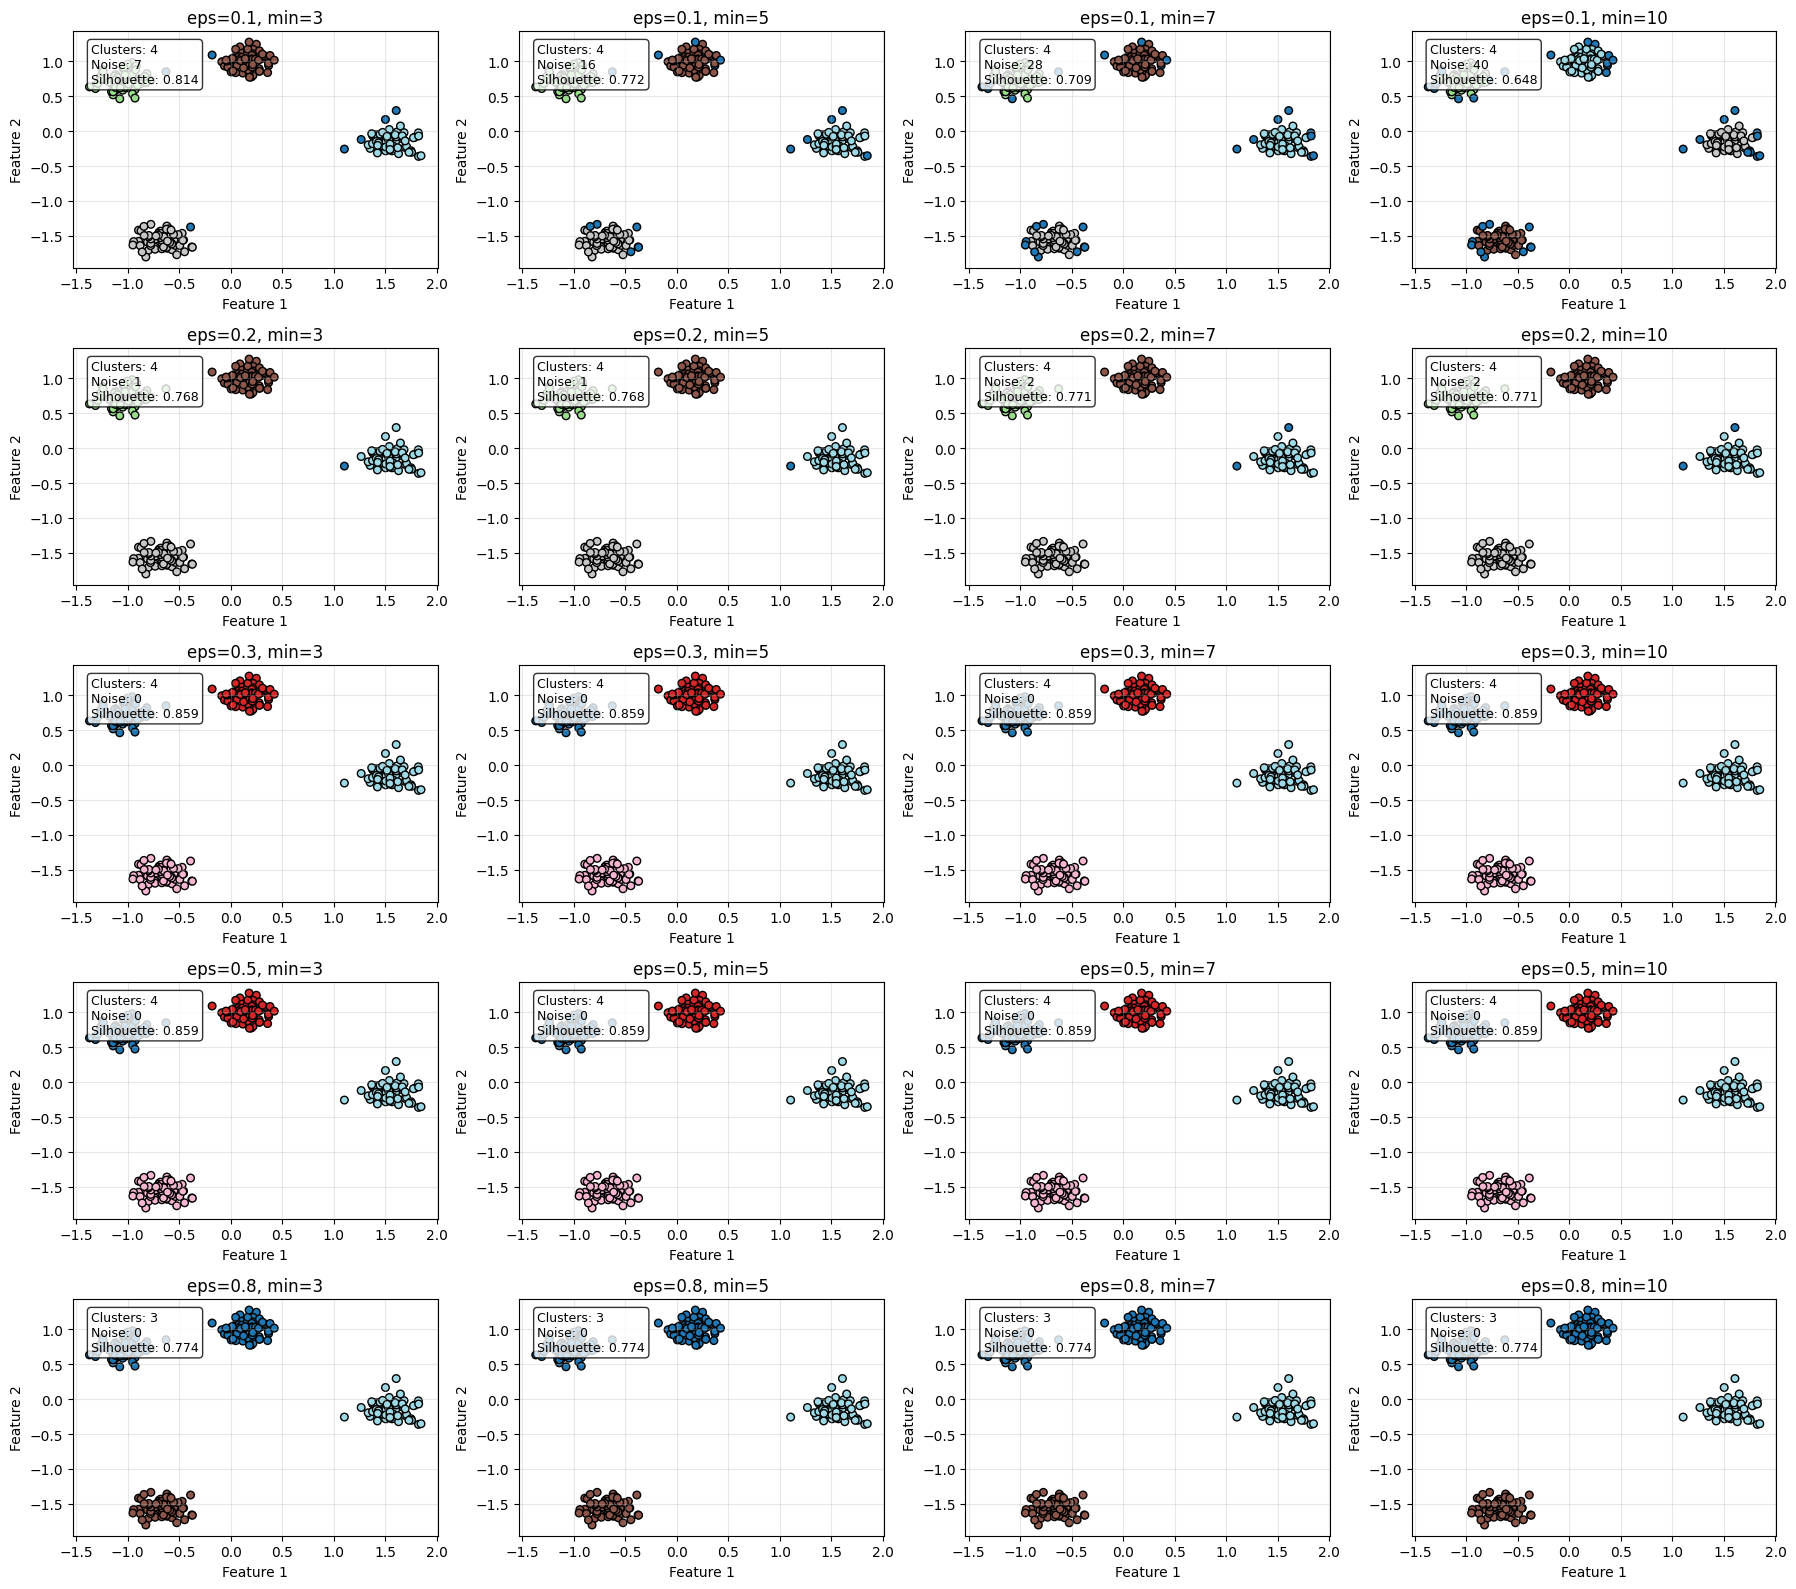


MEJORES PARÁMETROS ENCONTRADOS:
• eps: 0.3
• min_samples: 3.0
• Número de clusters: 4.0
• Puntos de ruido: 0.0
• Silhouette Score: 0.859

APLICANDO DBSCAN CON MEJORES PARÁMETROS:


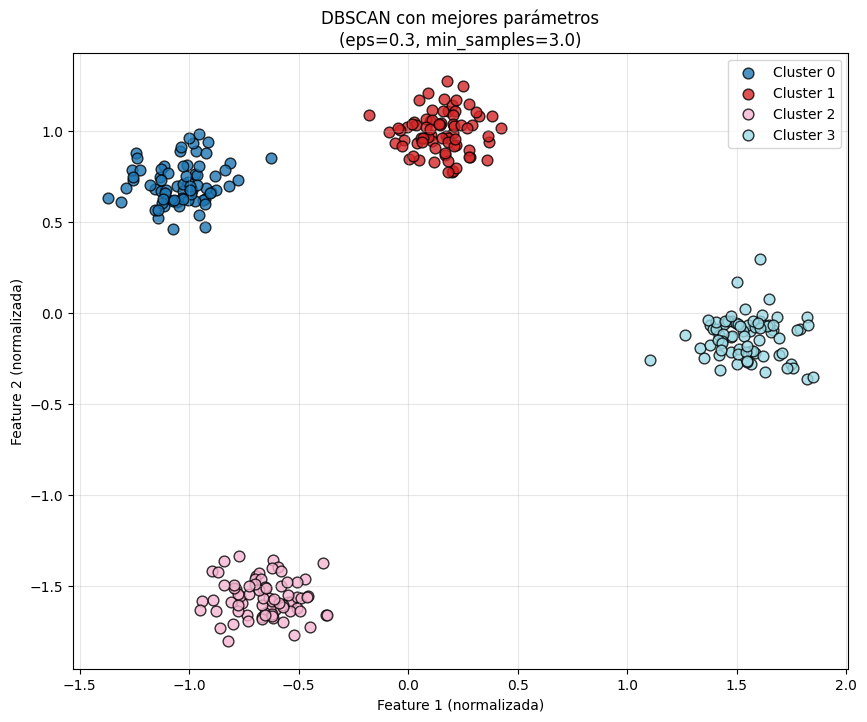

In [3]:
def dbscan_parameter_tuning():
    """
    Demo del ajuste de parámetros eps y min_samples en DBSCAN
    """
    print("\n" + "=" * 80)
    print("AJUSTE DE PARÁMETROS DBSCAN (eps y min_samples)")
    print("=" * 80)
    
    # Generar dataset sintético
    np.random.seed(42)
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)
    
    # Normalizar datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Valores de parámetros a probar
    eps_values = [0.1, 0.2, 0.3, 0.5, 0.8]
    min_samples_values = [3, 5, 7, 10]
    
    # Crear grid para visualización
    fig, axes = plt.subplots(len(eps_values), len(min_samples_values), 
                            figsize=(18, 16))
    
    # Matriz para almacenar métricas
    metrics = []
    
    # Probar diferentes combinaciones de parámetros
    for i, eps in enumerate(eps_values):
        for j, min_samples in enumerate(min_samples_values):
            # Aplicar DBSCAN
            db = DBSCAN(eps=eps, min_samples=min_samples)
            labels = db.fit_predict(X_scaled)
            
            # Acceder al subplot correspondiente
            ax = axes[i, j]
            
            # Graficar resultado
            scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                                c=labels, cmap='tab20', edgecolor='k', s=30)
            ax.set_title(f"eps={eps}, min={min_samples}")
            ax.set_xlabel("Feature 1")
            ax.set_ylabel("Feature 2")
            ax.grid(True, alpha=0.3)
            
            # Calcular métricas
            unique_labels = set(labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
            n_noise = np.sum(labels == -1)
            
            # Calcular silhouette score si hay al menos 2 clusters
            if n_clusters > 1 and n_clusters < len(X_scaled):
                try:
                    sil_score = silhouette_score(X_scaled, labels)
                    score_text = f"Silhouette: {sil_score:.3f}"
                except:
                    sil_score = np.nan
                    score_text = "Silhouette: N/A"
            else:
                sil_score = np.nan
                score_text = "Silhouette: N/A"
            
            # Mostrar métricas en el gráfico
            info_text = f"Clusters: {n_clusters}\nNoise: {n_noise}\n{score_text}"
            ax.text(0.05, 0.95, info_text, transform=ax.transAxes,
                   fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Guardar métricas
            metrics.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette_score': sil_score
            })
    
    plt.tight_layout()
    plt.savefig("./figures/evaluation.png")
    plt.show()
    
    # Crear DataFrame con métricas
    import pandas as pd
    metrics_df = pd.DataFrame(metrics)
    
    # Encontrar mejores parámetros basados en silhouette score
    valid_metrics = metrics_df.dropna(subset=['silhouette_score'])
    if len(valid_metrics) > 0:
        best_params = valid_metrics.loc[valid_metrics['silhouette_score'].idxmax()]
        
        print("\nMEJORES PARÁMETROS ENCONTRADOS:")
        print(f"• eps: {best_params['eps']}")
        print(f"• min_samples: {best_params['min_samples']}")
        print(f"• Número de clusters: {best_params['n_clusters']}")
        print(f"• Puntos de ruido: {best_params['n_noise']}")
        print(f"• Silhouette Score: {best_params['silhouette_score']:.3f}")
        
        # Aplicar DBSCAN con mejores parámetros
        print("\nAPLICANDO DBSCAN CON MEJORES PARÁMETROS:")
        db_best = DBSCAN(eps=best_params['eps'], 
                        min_samples=int(best_params['min_samples']))
        labels_best = db_best.fit_predict(X_scaled)
        
        # Visualizar resultado con mejores parámetros
        plt.figure(figsize=(10, 8))
        
        unique_labels = np.unique(labels_best)
        colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
        
        for label, color in zip(unique_labels, colors):
            if label == -1:
                cluster_points = X_scaled[labels_best == label]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                           c='black', marker='x', s=100, label='Noise')
            else:
                cluster_points = X_scaled[labels_best == label]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                           color=color, s=60, edgecolors='k', alpha=0.8,
                           label=f'Cluster {label}')
        
        plt.title(f"DBSCAN con mejores parámetros\n(eps={best_params['eps']}, min_samples={best_params['min_samples']})")
        plt.xlabel("Feature 1 (normalizada)")
        plt.ylabel("Feature 2 (normalizada)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.savefig("./figures/best.png")
        plt.show()
    
    return metrics_df

tuning_results = dbscan_parameter_tuning()